In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import math

In [2]:
titanic = pd.read_csv(r'D:\Unsupervised\8 Unsupervised Learning\Day2\titanic.csv', sep = ',')

In [3]:
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
print("The number of passangers we have in the original dataset:"  +str(len(titanic.index)))

The number of passangers we have in the original dataset:891


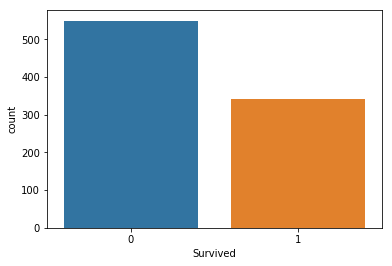

In [5]:
sns.countplot(x = 'Survived', data = titanic)

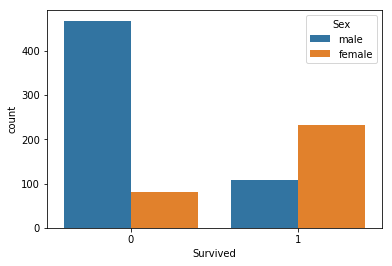

In [6]:
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic)

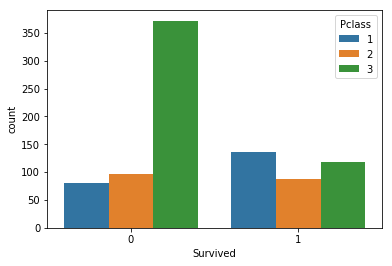

In [7]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic)

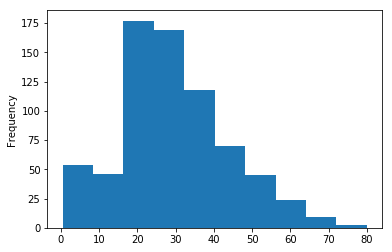

In [8]:
titanic['Age'].plot.hist()

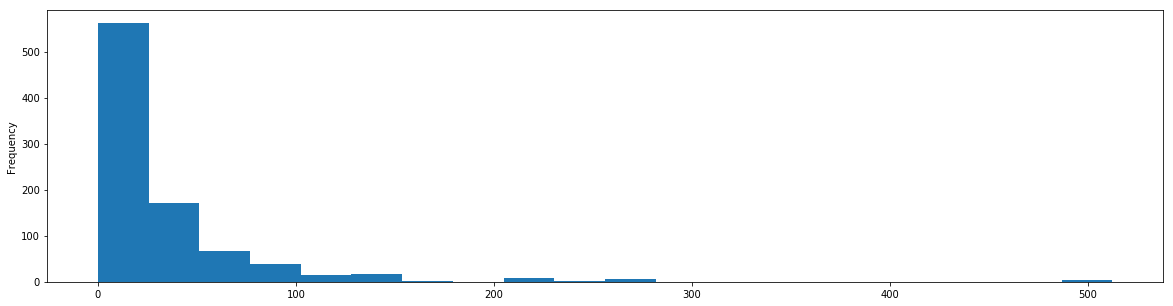

In [9]:
titanic['Fare'].plot.hist(bins = 20, figsize = (20, 5))

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


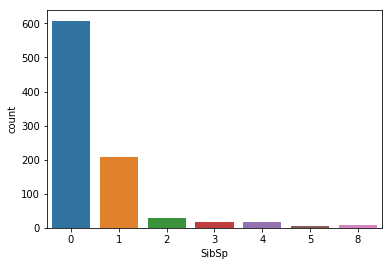

In [11]:
sns.countplot(x = 'SibSp', data = titanic)

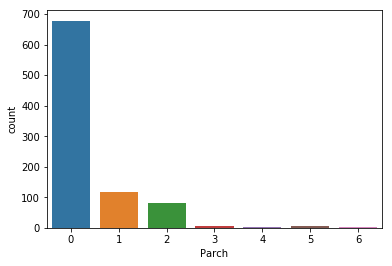

In [12]:
sns.countplot(x = 'Parch', data = titanic)

In [13]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [14]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

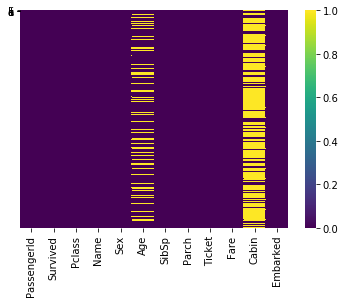

In [15]:
sns.heatmap(titanic.isnull(), yticklabels = 'False', cmap = "viridis")

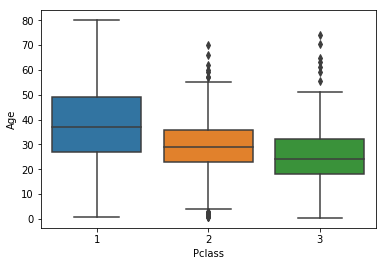

In [16]:
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

In [17]:
titanic.drop('Cabin', axis = 1, inplace = True)

In [18]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [19]:
titanic.dropna(inplace = True)

In [20]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

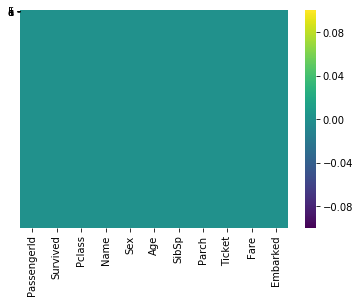

In [21]:
sns.heatmap(titanic.isnull(), yticklabels = 'False', cmap = "viridis")

In [22]:
sex = pd.get_dummies(titanic['Sex'], drop_first = 'True')

In [24]:
Embarked = pd.get_dummies(titanic['Embarked'], drop_first = True)

In [25]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [27]:
Pclass = pd.get_dummies(titanic['Pclass'], drop_first = True)

In [28]:
titanic = pd.concat([titanic, sex, Embarked, Pclass], axis = 1)

In [29]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1


In [31]:
titanic = titanic.drop(['Embarked', 'Pclass', 'Sex'], axis = 1)

In [32]:
titanic.head(3)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1


In [33]:
titanic = titanic.drop(['PassengerId'], axis = 1)

In [45]:
titanic = titanic.drop(['Ticket'], axis = 1)

In [53]:
titanic = titanic.drop(['Name'], axis = 1)

In [54]:
titanic.head(2)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0


In [55]:
X = titanic.drop(['Survived'], axis = 1)
y = titanic[['Survived']]

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
xtrain, xtest, ytrain, ytest=train_test_split(X,y, test_size=0.3, random_state=1)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
log = LogisticRegression()

In [60]:
log.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
predictions = log.predict(xtest)

In [62]:
from sklearn.metrics import classification_report

In [63]:
classification_report(ytest, predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.83      0.82       126\n           1       0.75      0.72      0.73        88\n\n   micro avg       0.79      0.79      0.79       214\n   macro avg       0.78      0.77      0.78       214\nweighted avg       0.78      0.79      0.78       214\n'

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
confusion_matrix(ytest, predictions)

array([[105,  21],
       [ 25,  63]], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(ytest, predictions)*100

78.50467289719626